In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("car_price_prediction.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [10]:
data.isnull().any()

ID                  False
Price               False
Levy                False
Manufacturer        False
Model               False
Prod. year          False
Category            False
Leather interior    False
Fuel type           False
Engine volume       False
Mileage             False
Cylinders           False
Gear box type       False
Drive wheels        False
Doors               False
Wheel               False
Color               False
Airbags             False
dtype: bool

In [12]:
data.duplicated().sum()

313

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data.duplicated().sum()

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [26]:
def mapper(value):
    value = value.split(' ')
    value = value[0]
    return float(value)

In [27]:
# filtering engine volume and mileage
data['Engine volume'] = data['Engine volume'].map(mapper)
data['Mileage'] = data['Mileage'].map(mapper)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  float64
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [42]:
def mapper2(value):
    if value == '-':
        return -1
    else:
        return float(value)

data['Levy'] = data['Levy'].map(mapper2)

        

In [43]:
for column in data.columns:
    UniqueNess = np.unique(data[column])
    value = len(UniqueNess)
    print("{} this columns have unique values = --->  {} ".format(column,value))

ID this columns have unique values = --->  18924 
Price this columns have unique values = --->  2315 
Levy this columns have unique values = --->  559 
Manufacturer this columns have unique values = --->  65 
Model this columns have unique values = --->  1590 
Prod. year this columns have unique values = --->  54 
Category this columns have unique values = --->  11 
Leather interior this columns have unique values = --->  2 
Fuel type this columns have unique values = --->  7 
Engine volume this columns have unique values = --->  65 
Mileage this columns have unique values = --->  7687 
Cylinders this columns have unique values = --->  13 
Gear box type this columns have unique values = --->  4 
Drive wheels this columns have unique values = --->  3 
Doors this columns have unique values = --->  3 
Wheel this columns have unique values = --->  2 
Color this columns have unique values = --->  16 
Airbags this columns have unique values = --->  17 


# statements 
 1. will drop column name id ,color,wheel,driver wheels,doors as this fetaure does not effects the traget feature
 2. price is target feature
 

In [44]:
filtered_data = data.drop(['ID','Color','Drive wheels','Wheel','Doors'],axis = 1)

In [45]:
filtered_data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,8
2,8467,-1.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,4


In [46]:
series_Price =filtered_data['Price']
series =series_Price.sort_values(ascending=False)
model1 =[]
model2 = []
model3 =[]
for i in range(0,450):
    if i < 10:
        value = series.index[i]
        model_name = data['Model'][value]
        model1.append(model_name)
        
    elif i>10 and i<150:
        value = series.index[i]
        model_name = data['Model'][value]
        model2.append(model_name)
    elif i>150 and i <450:
        value = series.index[i]
        model_name=data['Model'][value]
        model3.append(model_name)
    

In [49]:
def map_model(Model):
    if Model in model1:
        return 'Platinum'
    elif Model in model2:
        return 'Gold'
    elif Model in model3:
        return 'SILVER'
    else:
        return 'BRONZE'

In [50]:
filtered_data['Model'] = filtered_data['Model'].map(map_model)
filtered_data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Airbags
0,13328,1399.0,LEXUS,Gold,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,12
1,16621,1018.0,CHEVROLET,BRONZE,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,8
2,8467,-1.0,HONDA,BRONZE,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,2
3,3607,862.0,FORD,BRONZE,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,0
4,11726,446.0,HONDA,BRONZE,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,4


In [52]:
filtered_data.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Airbags             0
dtype: int64

In [53]:
filtered_data.duplicated().sum()

3225

In [54]:
filtered_data.drop_duplicates(inplace = True)
filtered_data.duplicated().sum()

0

In [56]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15699 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15699 non-null  int64  
 1   Levy              15699 non-null  float64
 2   Manufacturer      15699 non-null  object 
 3   Model             15699 non-null  object 
 4   Prod. year        15699 non-null  int64  
 5   Category          15699 non-null  object 
 6   Leather interior  15699 non-null  object 
 7   Fuel type         15699 non-null  object 
 8   Engine volume     15699 non-null  float64
 9   Mileage           15699 non-null  float64
 10  Cylinders         15699 non-null  float64
 11  Gear box type     15699 non-null  object 
 12  Airbags           15699 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 1.7+ MB


<Axes: >

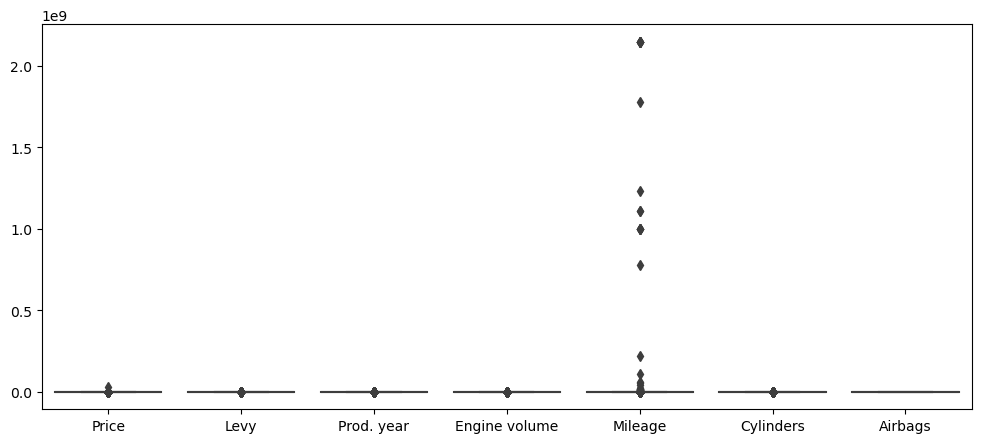

In [58]:
plt.subplots(figsize=(12,5))
sns.boxplot(filtered_data)

In [62]:
columns = ['Price','Levy','Prod. year','Engine volume','Mileage','Cylinders']

In [63]:
def outlier_capping(dataframe , columns):
    df = dataframe.copy()
    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3 + 1.5*(iqr)
        lower_limit = q1 - 1.5*(iqr)
        df.loc[df[i]>upper_limit,i] = upper_limit
        df.loc[df[i]<lower_limit,i] = lower_limit
        
    return df
df = outlier_capping(filtered_data,columns)

<Axes: >

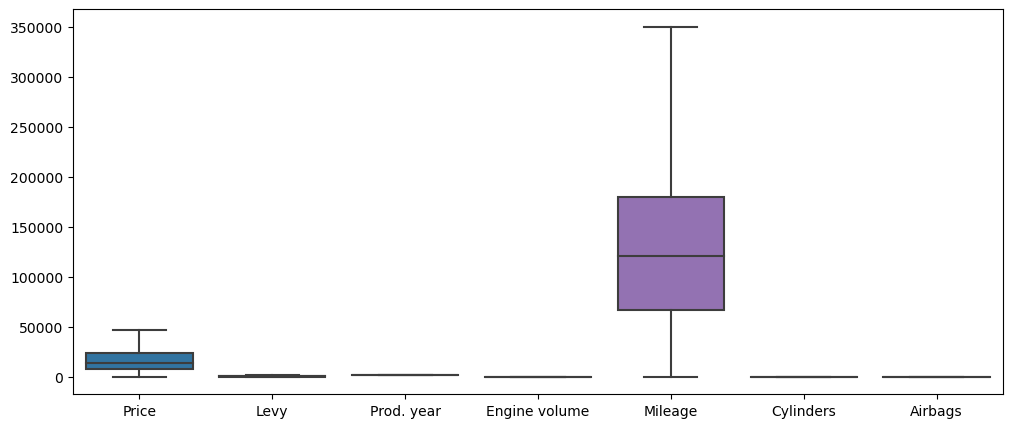

In [64]:
plt.subplots(figsize = (12,5))
sns.boxplot(df)

C:\Users\jain6\AppData\Local\Temp\ipykernel_13488\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

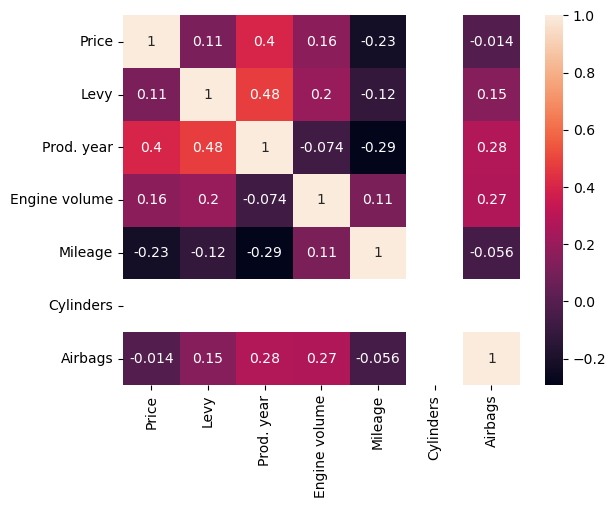

In [66]:
sns.heatmap(df.corr(),annot=True)

In [68]:
df.drop(['Cylinders'],axis= 1,inplace = True)

C:\Users\jain6\AppData\Local\Temp\ipykernel_13488\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

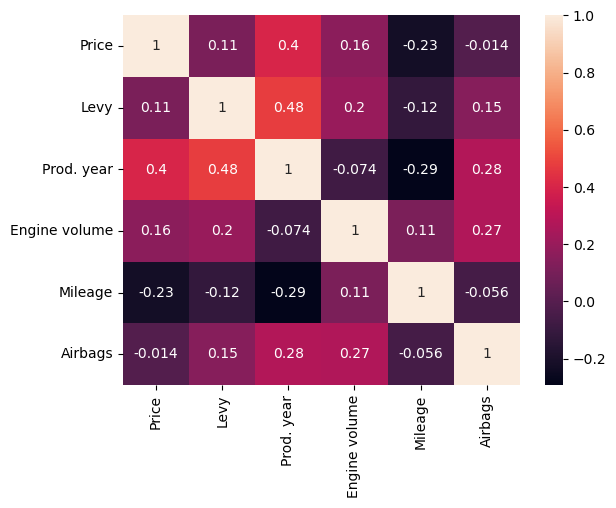

In [69]:
sns.heatmap(df.corr(),annot=True)

In [70]:
df.duplicated().sum()

165

In [71]:
df.drop_duplicates(inplace = True)

In [72]:
df.duplicated().sum()

0

In [ ]:
df.to